In [9]:
#必要なクラスをインポート
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 今日使用データをインプット
df = pd.read_csv('/Users/suzukiyuuta/Downloads/train.csv')#教師データを読み込む

df_XY = df.loc[:,['GrLivArea','YearBuilt','SalePrice']]
# display(df_XY)
np_XY = df_XY.values
np_X = np_XY[:, :2]
np_Y = np_XY[:, 2:3]

from sklearn.model_selection import train_test_split
# ndarray変換
X_array = np_X
y_array = np_Y
X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

# バイアス＝TRUEの時は下記をXとして扱う
# np_1 = np.ones((1460,1))
# np_1X = np.concatenate([np_1, np_X], 1)

In [2]:
# 初期推定
# np.random.seed(0) 
# param_vec = np.random.uniform(0, 100, (1, 3))
# y = param_vec @ np_1X.T
# y = y.T
# print(y)
num_iter: int = 100
lr: float = 0.000001
no_bias: bool = False
verbose : bool = True

X = np_X

np_1 = np.ones((X.shape[0],1)) # 行列の長さを自動取得する
if no_bias != True:
    X = np.concatenate([np_1, X], 1) # バイアス＝TRUEの時は下記をXとして扱う
else:
    pass
np.random.seed(0) #本来は与えられるパラメータベクトル
param_vec = np.random.uniform(0, 100, (1, X.shape[1]))

print(type(X))
print(param_vec)


y_pred = param_vec @ X.T
y_pred

<class 'numpy.ndarray'>
[[54.88135039 71.51893664 60.27633761]]


array([[243085.76722723, 209417.82249835, 248400.65373644, ...,
        284405.56437704, 194691.15337931, 208325.66916485]])

# 【問題1】仮定関数

In [25]:
# 関数化
# クラスパラメータ値を借りで入力
# num_iter: int = 100
# lr: float = 0.000001
# no_bias: bool = False
# verbose : bool = True

def _linear_hypothesis(self,X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    
    h0 = np.dot(X, self.coef_.T)
    # coef_.Tでベクトルを転置すると予期せぬ結果が発生する
    # →　だからベクトルの内積時は次元追加の方が良い（newaxis or reshape）
    
    return h0
#     np_1 = np.ones((X.shape[0],1)) # 行列の長さを自動取得する
#     if no_bias != True:
#         X = np.concatenate([np_1, X], 1) # バイアス＝TRUEの時は下記をXとして扱う
#     else:
#         pass
#     np.random.seed(0) #本来は与えられるパラメータベクトル
#     param_vec = np.random.uniform(0, 100, (1, X.shape[1]))
#     y_pred = (param_vec @ X.T).T
#     pass
#     return y_pred

# _linear_hypothesis(np_X)
# yp = _linear_hypothesis(np_X)
# print(yp)

# 【問題2】最急降下法

In [19]:
def _gradient_descent(self, X, error):
    stu = 0.0000000001

    self.coef_ = self.coef_ - stu/X.shape[0]*(error.T @ X).T

# pv_next = param_vec
# for n in range(num_iter):
#     param_da = pv_next[0]
#     for j in range(X.shape[1]):
#         for i in range(X.shape[0]):
#             result0 += (param_da*X[i] - np_Y[i])*X[i]
#         pv0 = param_da - stu/X.shape[0]*result0
# #         print(- stu/X.shape[0]*result0)
#         pv_next = np.insert(pv_next,0,pv0)
# print(pv_next)

# X.shape[0] = 1460
# X.shape[1] = 3
# error.T.shape
# X[:, 0].shape
# X.shape[0] = 1460
# X.shape[1] = 3

# 【問題4】平均二乗誤差

In [16]:
def MSE(y_pred, y):
    suma = 0
    for i in range(y_pred.shape[0]):
        suma += (y_pred[i] - y[i]) **2
    mse = (1/y_pred.shape[0])*suma
    
    pass
    return mse

MSE(yp,np_Y)

array([5.51645086e+09])

# 【問題3】推定

In [100]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias=None, verbose=None):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        #パラメーターの初期値（平均０、分散１の正規分布）
        self.coef_ = np.random.normal(0, 1, X.shape[1])
        self.stu = 0.0000000001
#         print(self.coef_)
#         self.coef_ = None # とすることで、fitをを呼び出さなくてもcoefが使用できる（先にpredictやる時とか）
        # self/h0も同様

    def _linear_hypothesis2(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
#         print(self.coef_)
        coef_T = (self.coef_).T
        
        h0 = np.dot(X, coef_T)
        # coef_.Tでベクトルを転置すると予期せぬ結果が発生する
        # →　だからベクトルの内積時は次元追加の方が良い（newaxis or reshape）

        return h0
    def _gradient_descent2(self,X,error):

        self.coef_ = self.coef_ - self.stu/X.shape[0]*(error.T @ X).T
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # yの一次元化
        y = y.ravel()
        y_val = y_val.ravel()
        
        # 切片列を追加（切片の有無を選べる）
        if not self.bias:   
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
            X_val = np.concatenate([np.ones([X_val.shape[0], 1]), X_val], axis=1)
        
#         print(self.coef_)
        
        for iter_count in range(self.iter):
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の学習".format(iter_count))
            
            # 過程関数
#             print(iter_count)
            h0 = self._linear_hypothesis2(X)
            h0_val = self._linear_hypothesis2(X_val)
            # _linear_hypothesis　→　これだけでh0の更新、fit内部ではself.h0で更新後の値が呼び出せる、retunいらない
            
            # 最急降下法（error算出→勾配算出）
            error = h0 - y
            self._gradient_descent2(X,error)
#             print(self.coef_)
            # self._gradient_descent →　これだけでself.coef_の更新、fit内部ではself.coef_で更新後の値が呼び出せる、retunいらない
            
            # costの記録
            self.loss[iter_count] = loss_cal(h0 , y)
            self.val_loss[iter_count] = loss_cal(h0_val , y_val)
    
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if not self.bias:   
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
        h0 = np.dot(X, self.coef_.T)
        
        return h0

In [101]:
slrg = ScratchLinearRegression(5000, 0.001)
slrg.fit(X_train, y_train, X_valid, y_valid)

In [103]:
slrg.predict(X_valid)

array([225827.48025329, 178585.90654112, 160476.1259371 , 202441.74633495,
       156064.28761845, 149440.89578048, 176353.64733044, 168323.46453749,
       324982.28615682, 158266.96586706, 170754.05203768, 185449.22855851,
       201648.12548581, 146346.72451622, 154378.98324645, 166336.61111024,
       198313.89703732, 152201.73408536, 162542.2852792 , 189525.27696609,
       169594.8698082 , 145685.21668943, 141978.88153675, 176523.14686574,
       195054.50511711, 183657.04974447, 181390.74018517, 133127.63637227,
       187944.70759645, 160964.86156667, 189273.26235642, 191034.53647896,
       147510.24912745, 212349.76867343, 205234.43204637, 174892.91604571,
       181055.0137765 , 145713.79143406, 207353.39849597, 233041.94927391,
       207781.52146717, 168511.72083165, 168621.86793561, 194625.24892367,
       241613.61130154, 187206.03329449, 142010.7924457 , 146515.15433167,
       185701.30667058, 146746.27274278, 235786.17025959, 154812.70882645,
       168362.04777507, 1

In [105]:
MSE(slrg.predict(X_valid),y_valid)

array([4.29963088e+09])

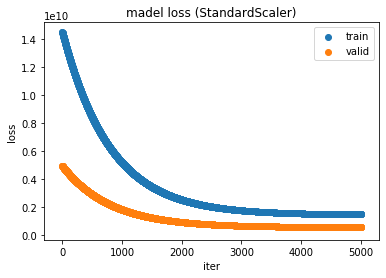

In [97]:
iter_list = [i for i in range(slrg.iter)]
plt.scatter(iter_list, slrg.loss, label="train")
plt.scatter(iter_list, slrg.val_loss, label="valid")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss (StandardScaler)')
plt.legend();

In [96]:
slrg.coef_.shape

(3,)

# 【問題5】目的関数

In [22]:
def loss_cal(y_pred , y):
    """
    損失関数の計算と記録

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    cost : numpy.float
      平均二乗誤差
    """
    loss = ((y_pred-y)**2).sum() / X.shape[0] / 2
    
    return loss

In [ ]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    pass
    return

In [6]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    """
    num_iter: int = 100
    lr: float = 0.000001
    no_bias: bool = True
    verbose : bool = True

    """
    self.coef_ : 次の形のndarray, shape (特徴量の数,)
    self.loss : 次の形のndarray, shape (学習用データに対する損失の記録を格納,)
    self.val_loss : 次の形のndarray, shape (検証用データに対する損失の記録を格納,)
    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y), X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        線形回帰を使い推定する。
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        pass
        return

SyntaxError: invalid syntax (<ipython-input-6-b38e3ac97ecc>, line 26)